In [48]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load and preview data
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Data Science Portfolio\Customer Churn\Data\Telco-Customer-Churn.csv")
print("Data Shape: ", df.shape)
print(df.head())

Data Shape:  (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMov

In [49]:
# Replace hidden missing values with np.nan
df.replace(["", " ", "NA", "Nan"], np.nan, inplace=True)

# Combine hidden + true missing check
print("Missing values by column (after standardization):")

print("Missing values by column:\n")
missing = df.isnull().sum().sort_values(ascending = False)
print(missing)


Missing values by column (after standardization):
Missing values by column:

TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
gender               0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
dtype: int64


In [50]:
# Clean missing values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')
df.dropna(inplace = True)

In [51]:
#Rename columns to fintech context
df.rename(columns = {
    "tenure": "months_active",
    "tenure": "months_active",
    "MonthlyCharges": "monthly_spend",
    "TotalCharges": "total_transaction_value",
    "Contract": "subscription_type",
    "PhoneService": "has_cash_card",
    "InternetService": "digital_access_level",
    "Churn": "churned"
}, inplace = True)

display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,months_active,has_cash_card,MultipleLines,digital_access_level,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,subscription_type,PaperlessBilling,PaymentMethod,monthly_spend,total_transaction_value,churned
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
# Encode churn column to binary
df["churned"] = df["churned"].map({"Yes": 1, "No": 0})

#Preview cleaned data
print("Cleaned Dataset Preview:")
display(df.head())

Cleaned Dataset Preview:


,customerID,gender,SeniorCitizen,Partner,Dependents,months_active,has_cash_card,MultipleLines,digital_access_level,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,subscription_type,PaperlessBilling,PaymentMethod,monthly_spend,total_transaction_value,churned
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


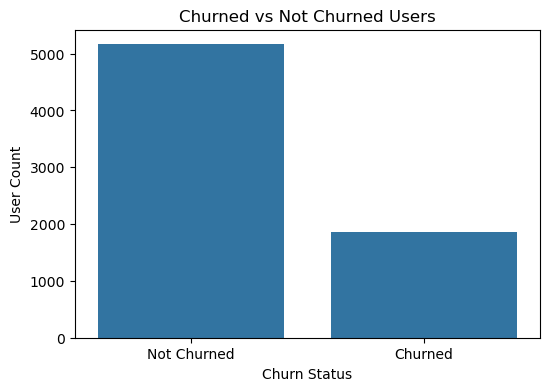

In [53]:
# Visualisations

#Churn distribution
plt.figure(figsize = (6, 4))
sns.countplot(x = 'churned', data = df)
plt.title("Churned vs Not Churned Users")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.xlabel("Churn Status")
plt.ylabel("User Count")
plt.show()

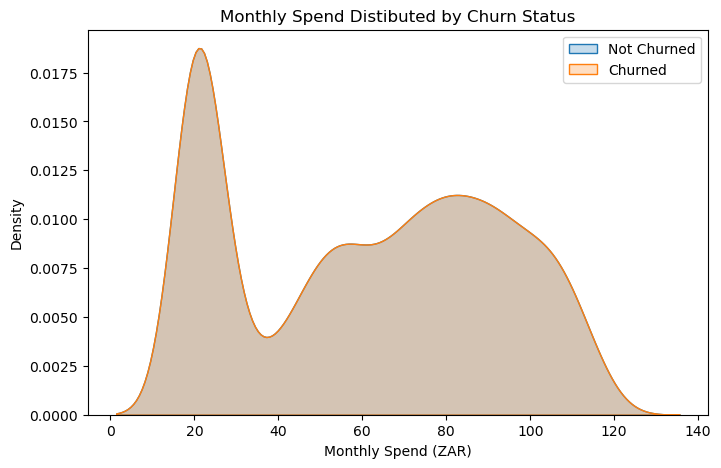

In [56]:
# Monthly Spend by Churn
plt.figure(figsize = (8, 5))
sns.kdeplot(df[df["churned"] == 0]["monthly_spend"], label = "Not Churned", fill = True)
sns.kdeplot(df[df["churned"] == 0]["monthly_spend"], label = "Churned", fill = True)
plt.title("Monthly Spend Distibuted by Churn Status")
plt.xlabel("Monthly Spend (ZAR)")
plt.legend()
plt.show()

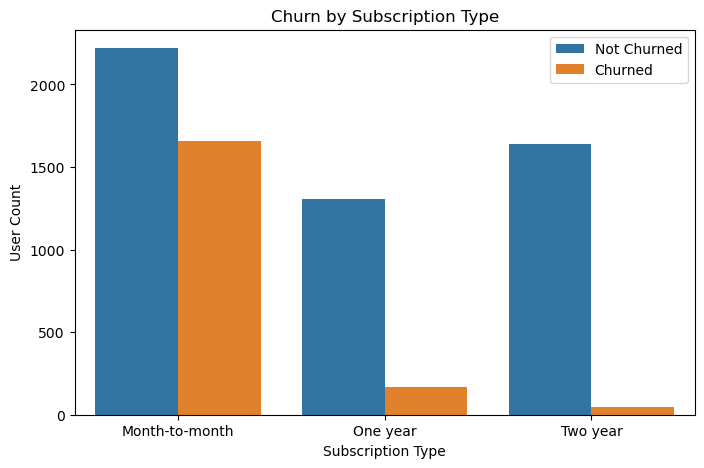

In [57]:
# Subscription type vs churn

plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = "subscription_type", hue = "churned")
plt.title("Churn by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("User Count")
plt.legend(["Not Churned", "Churned"])
plt.show()